In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("haberman.csv",names=col)

In [14]:
#checking the number of datapoints in the dataset
df.shape

(306, 4)

In [15]:
col = ['Patient_Age','Year_of_operation','positive_auxillary_nodes','status']
df = pd.read_csv("haberman.csv",names=col)

In [24]:
df.head()

,Patient_Age,Year_of_operation,positive_auxillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [17]:
#Checking for balanced and imbalanced dataset
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observations:**

1)225 people survived more than or equal to 5 years .

2)81 people died within 5 years.

In [9]:
print(df.columns)

Index(['Patient_Age', 'Year_of_operation', 'positive_auxillary_nodes',
       'status'],
      dtype='object')


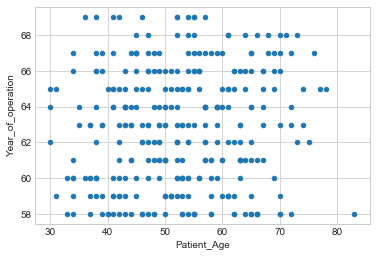

In [25]:
df.plot(kind='scatter', x='Patient_Age', y= 'Year_of_operation' ) ;
plt.show()

**Observation:**

1)It can be roughly said from the above plot mainly patients between the age 40 to 65 have the more number of operations.

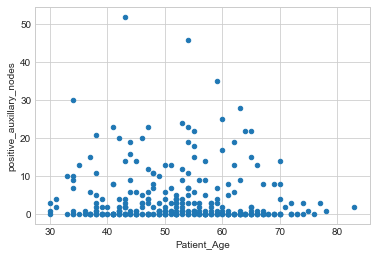

In [24]:
df.plot(kind='scatter', x='Patient_Age', y= 'positive_auxillary_nodes' ) ;
plt.show()

**Observation:**

1)It can be roughly said that people between the age 35 to 70 has highest number of positive auxillary nodes.

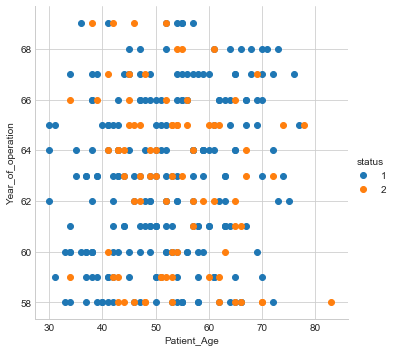

In [26]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=5) \
   .map(plt.scatter, "Patient_Age", "Year_of_operation") \
   .add_legend();
plt.show();

**observation:**

From the plot it can be roughly said that patients who survived less than 5 years are more  between the age 42 to 62. 


# pair plot

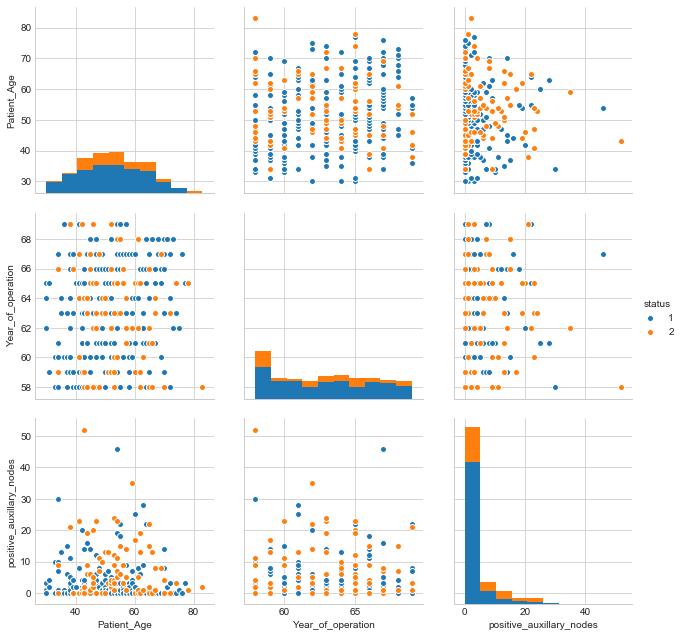

In [28]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="status", vars = ["Patient_Age", "Year_of_operation", "positive_auxillary_nodes"],size=3)
plt.show()

#  Histogram, PDF, CDF

C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


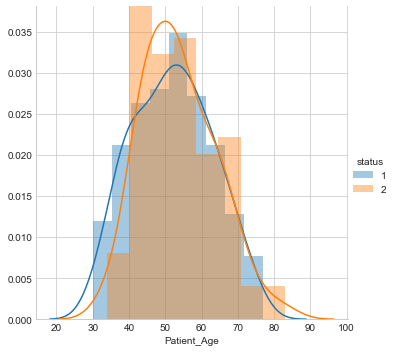

In [19]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "Patient_Age") \
   .add_legend();
plt.show();


**Observation:**
 
 1)In the given dataset people in age from 40 to 50 survived the least.

In [28]:
print("Mean age of patients survived:",round(np.mean(df[df['status']==1]['Patient_Age'])))
print("Mean age of patients not survived:",round(np.mean(df[df['status']==2]['Patient_Age'])))

Mean age of patients survived: 52
Mean age of patients not survived: 54


C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


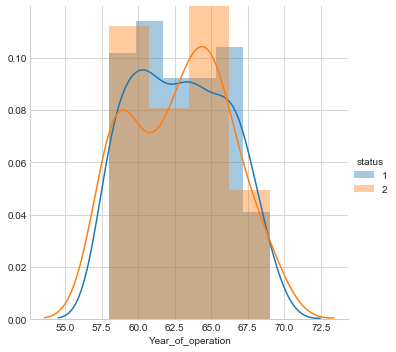

In [21]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "Year_of_operation") \
   .add_legend();
plt.show();

**Observation:**

1)Patients operated between the year 1963 and 1967 survived are less.

C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


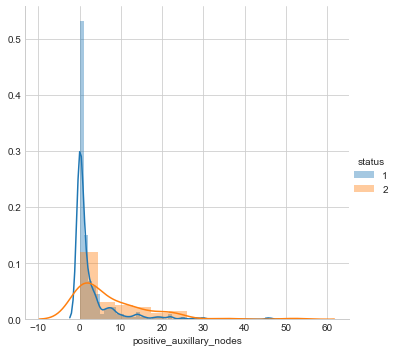

In [22]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "positive_auxillary_nodes") \
   .add_legend();
plt.show();

**Observation:**

1)It can be clearly seen that people with less number of nodes lived for more than 5 years.

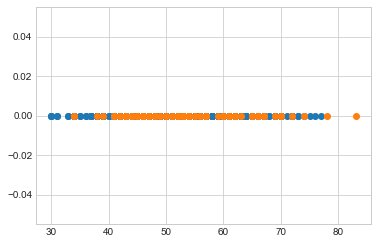

In [54]:
survival = df[df['status']==1]
notsurvival = df[df['status']==2]
plt.plot(survival["Patient_Age"], np.zeros_like(survival['Patient_Age']), 'o')
plt.plot(notsurvival["Patient_Age"], np.zeros_like(notsurvival['Patient_Age']), 'o')

**Observation:**

 1)From the plot the patients between the age 30 to 36 survived for more than 5 years.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


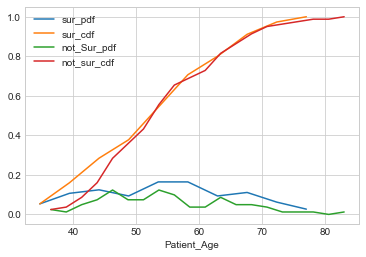

In [55]:
counts, bin_edges = np.histogram(survival['Patient_Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(notsurvival['Patient_Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(['sur_pdf','sur_cdf','not_Sur_pdf','not_sur_cdf'])
plt.xlabel('Patient_Age')
plt.show();


**Observation:**

1)patients who are having age above 75 are not survived.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


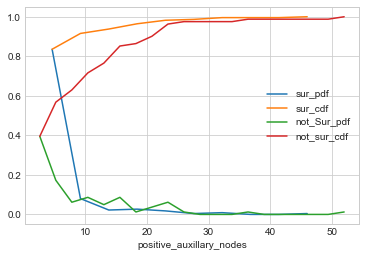

In [53]:
counts, bin_edges = np.histogram(survival['positive_auxillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(notsurvival['positive_auxillary_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(['sur_pdf','sur_cdf','not_Sur_pdf','not_sur_cdf'])
plt.xlabel('positive_auxillary_nodes')
plt.show();

**Observation:**

1)Patients who are having auxilary nodes more than 45 are not survived.

In [39]:
survival.describe()

,Patient_Age,Year_of_operation,positive_auxillary_nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [40]:
notsurvival.describe()

,Patient_Age,Year_of_operation,positive_auxillary_nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [57]:
#Median, Quantiles, Percentiles, IQR.
print("For Patient age")

print("\nMedians:")
print(np.median(survival["Patient_Age"]))
print(np.median(notsurvival["Patient_Age"]))

print("\nQuantiles:")
print(np.percentile(survival["Patient_Age"],np.arange(0, 100, 25)))
print(np.percentile(notsurvival["Patient_Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survival["Patient_Age"],90))
print(np.percentile(notsurvival["Patient_Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survival["Patient_Age"]))
print(robust.mad(notsurvival["Patient_Age"]))

For Patient age

Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [62]:
#Median, Quantiles, Percentiles, IQR.
print("For positive_auxillary_nodes")

print("\nMedians:")
print(np.median(survival["positive_auxillary_nodes"]))
print(np.median(notsurvival["positive_auxillary_nodes"]))

print("\nQuantiles:")
print(np.percentile(survival["positive_auxillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(notsurvival["positive_auxillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survival["positive_auxillary_nodes"],90))
print(np.percentile(notsurvival["positive_auxillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survival["positive_auxillary_nodes"]))
print(robust.mad(notsurvival["positive_auxillary_nodes"]))


For positive_auxillary_nodes

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


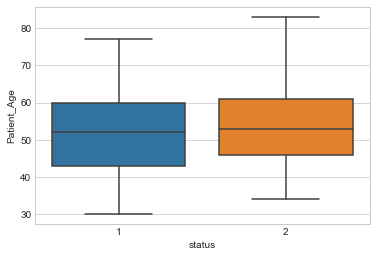

In [51]:
sns.boxplot(x='status',y='Patient_Age', data=df)
plt.show()

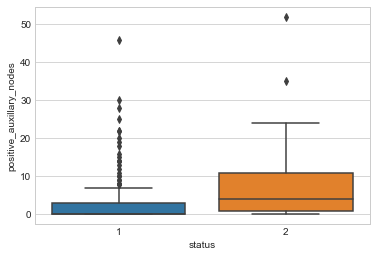

In [45]:
sns.boxplot(x='status',y='positive_auxillary_nodes', data=df)
plt.show()

**Observation:**

1)From the box plot 'positive auxillary nodes' can be used as a good feature to differentiate status 1 and 2.

C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yagnapooja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


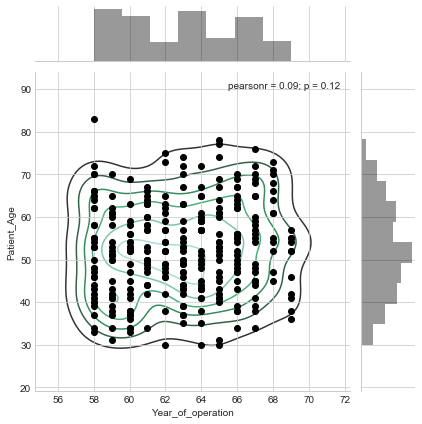

In [49]:
g = (sns.jointplot("Year_of_operation", "Patient_Age",data=df, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

**Observation:**

1)There are more number of people undergone operation during the year 1960 - 1965 period
and between ages 40 - 62.
2)The correlation between the two attributes is very low.